# Finding characteristics of the solution set

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import itertools

sns.set()

## Defining Functions

In [2]:
#defining functions

#splitting word into letters
def split(word):
    return [char for char in word]

#checking if word has two letters together
def has_both_letters(pair, word):
    if pair[1] in word and pair[0] in word:
        return True
    else:
        return False

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Initilizaing Solution dataframe

In [4]:
solutions = pd.read_csv('/content/drive/MyDrive/valid_solutions.csv')
solutions = solutions.apply(lambda x: x.astype(str).str.upper())
solutions

,word
0,ABACK
1,ABASE
2,ABATE
3,ABBEY
4,ABBOT
...,...
2310,YOUNG
2311,YOUTH
2312,ZEBRA
2313,ZESTY


## Creating a dataframe of letters of each word

In [5]:
letters = solutions.apply(lambda x:split(x[0]), axis=1,result_type='expand')
letters.columns = ["l1", "l2", "l3", "l4", "l5",]

In [6]:
letters

,l1,l2,l3,l4,l5
0,A,B,A,C,K
1,A,B,A,S,E
2,A,B,A,T,E
3,A,B,B,E,Y
4,A,B,B,O,T
...,...,...,...,...,...
2310,Y,O,U,N,G
2311,Y,O,U,T,H
2312,Z,E,B,R,A
2313,Z,E,S,T,Y


## Finding frequency of each letter for each position

In [7]:
letters_freq = letters.apply(pd.Series.value_counts)
letters_freq['sum'] = letters_freq.sum(1)
letters_freq.index.name = 'letter'
letters_freq.reset_index(inplace=True)
letters_freq

,letter,l1,l2,l3,l4,l5,sum
0,A,141.0,304,307,163.0,64.0,979.0
1,B,173.0,16,57,24.0,11.0,281.0
2,C,198.0,40,56,152.0,31.0,477.0
3,D,111.0,20,75,69.0,118.0,393.0
4,E,72.0,242,177,318.0,424.0,1233.0
5,F,136.0,8,25,35.0,26.0,230.0
6,G,115.0,12,67,76.0,41.0,311.0
7,H,69.0,144,9,28.0,139.0,389.0
8,I,34.0,202,266,158.0,11.0,671.0
9,J,20.0,2,3,2.0,NaN,27.0


## Feature 1: The frequency of occurence of each letter irrespective of position

[Text(0.5, 1.0, 'Most commonly occuring letters')]

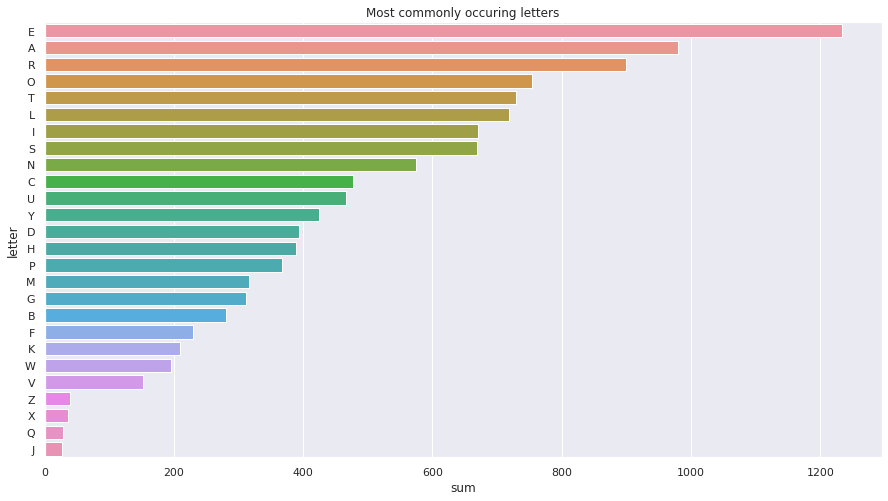

In [8]:
plt.figure(figsize = (15,8))
sns.barplot(x="sum", y="letter", data=letters_freq.sort_values("sum", ascending=False)).set(title='Most commonly occuring letters')

## Feature 2: The frequency of occurence of each letter at each position

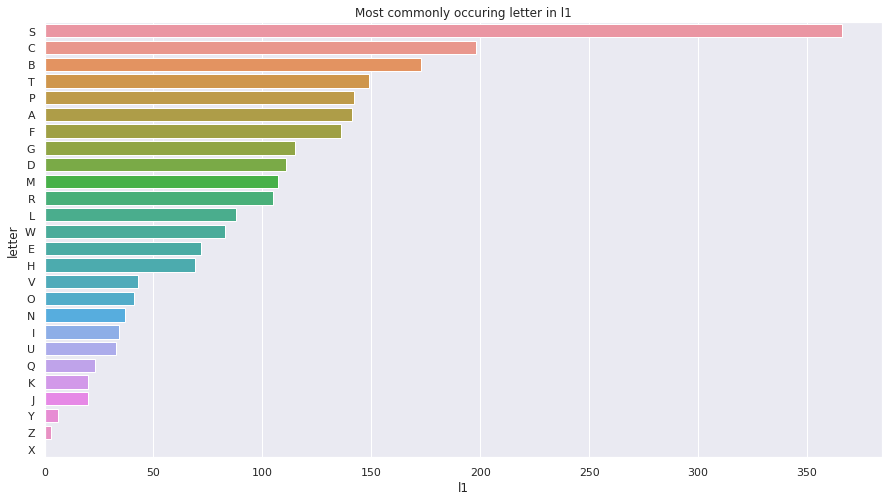

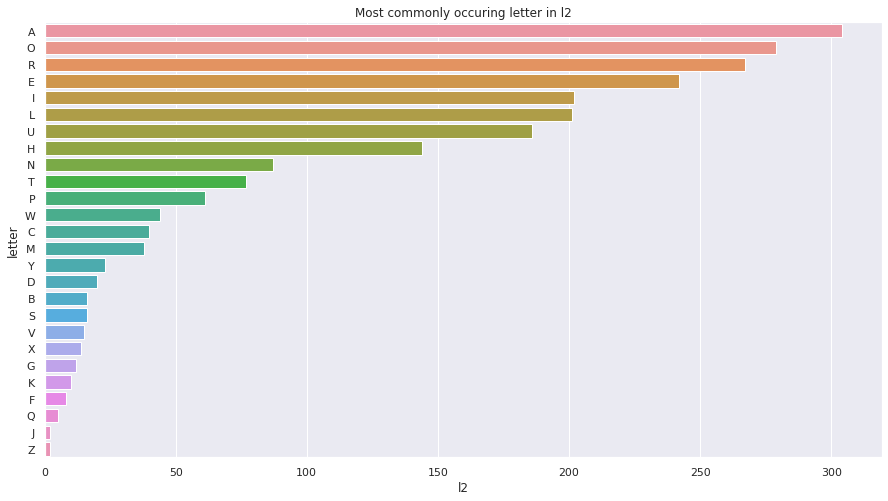

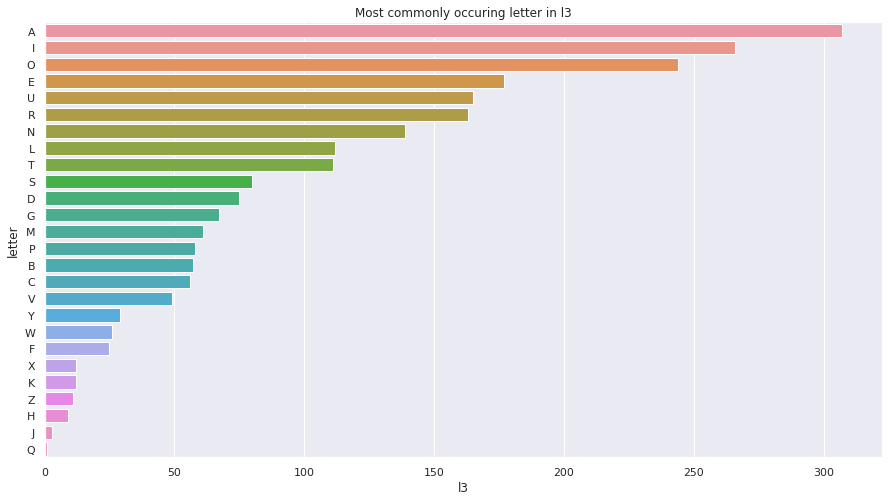

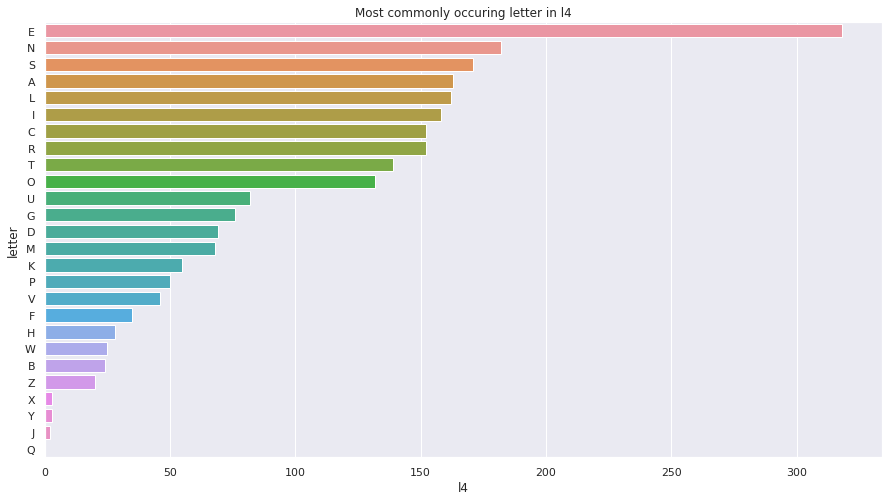

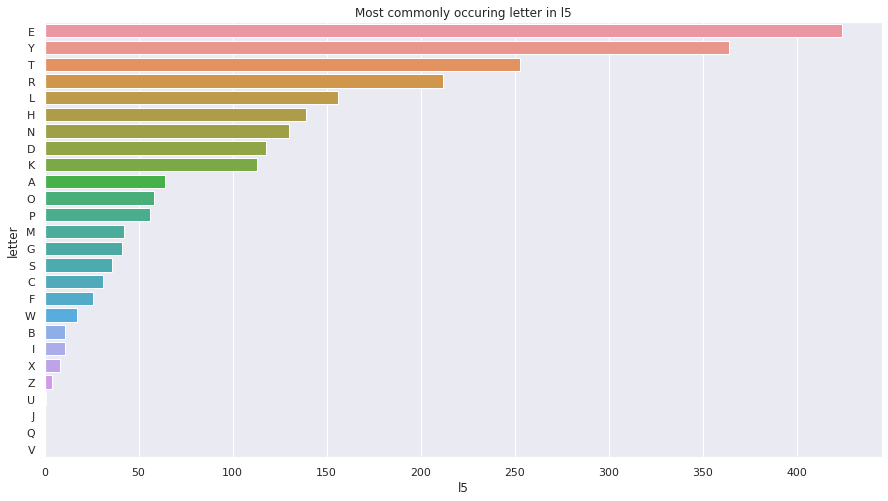

In [9]:
for column in ['l1','l2','l3','l4','l5']:
  plt.figure(figsize = (15,8))
  sns.barplot(x=column, y="letter", data=letters_freq.sort_values(column, ascending=False)).set(title="Most commonly occuring letter in "+column)

## Feature 3: Pairs of letter that never occur together

In [10]:
alphabet_list = list(string.ascii_uppercase)
solutions_list = list(solutions['word'])

pair_list = list(itertools.combinations(alphabet_list,2))
pair_absent = []

for pair in pair_list:
    new_list = [has_both_letters(pair, word) for word in solutions_list]
    if not any(new_list):
        pair_absent.append(pair)
pair_absent

[('F', 'Q'),
 ('G', 'Q'),
 ('G', 'X'),
 ('J', 'Q'),
 ('J', 'V'),
 ('J', 'X'),
 ('K', 'X'),
 ('K', 'Z'),
 ('Q', 'V'),
 ('Q', 'W'),
 ('Q', 'X'),
 ('Q', 'Z'),
 ('V', 'Z'),
 ('X', 'Z')]